# Twomoons data example
This is an example that illustrates how to synthesize data with `arfpy`.

In [302]:
from sklearn.datasets import make_moons
from arfpy import arf
import pandas as pd

# for creating the exact same figure/numbers from the paper, use this seed
from numpy import random
random.seed(seed=2023)

First, we load the data:

In [303]:
moons_X, moons_y = make_moons ( n_samples = 3000 , noise =0.1)
df = pd.DataFrame({"dim_1" : moons_X[:,0], "dim_2" : moons_X[:,1], "label" : moons_y})
df['label'] = df['label'].astype('category')

df.head()

,dim_1,dim_2,label
0,1.782717,0.099124,1
1,1.087497,0.298744,0
2,-0.576695,0.801675,0
3,0.623931,-0.506896,1
4,-0.068446,0.150676,1


Now we can define the ARF object:

In [304]:
my_arf = arf.arf(x = df) 


Initial accuracy is 0.8245
Iteration number 1 reached accuracy of 0.3611666666666667.


In [305]:
df.head()

,dim_1,dim_2,label
0,1.782717,0.099124,1
1,1.087497,0.298744,0
2,-0.576695,0.801675,0
3,0.623931,-0.506896,1
4,-0.068446,0.150676,1


Next, we estimate the density:

In [306]:
FORDE = my_arf.forde()

In [307]:
FORDE['cnt'].iloc[:,:5]

,tree,nodeid,variable,mean,sd
0,0,3,dim_1,0.961437,0.214925
1,0,3,dim_2,-0.671571,0.028193
2,0,11,dim_1,1.040565,0.185581
3,0,11,dim_2,-0.621924,0.003328
4,0,12,dim_1,0.965529,0.233077
...,...,...,...,...,...
535,29,800,dim_2,0.481730,0.012833
536,29,808,dim_1,1.790619,0.549172
537,29,808,dim_2,0.575033,0.055909
538,29,809,dim_1,2.082730,0.047885


In [308]:
type(FORDE)

dict

Finally, we can generate some new data:

In [309]:
df_syn = my_arf.forge(n = 1000)

In [310]:
df_syn.head()

,dim_1,dim_2,label
0,-0.018004,0.283963,1
1,1.734200,-0.085115,1
2,-0.009840,1.046872,0
3,0.868400,-0.352692,1
4,2.083446,0.187649,1


Let's invesitgate whether our synthesized data looks realistic!

In [311]:
from matplotlib import pyplot as plt

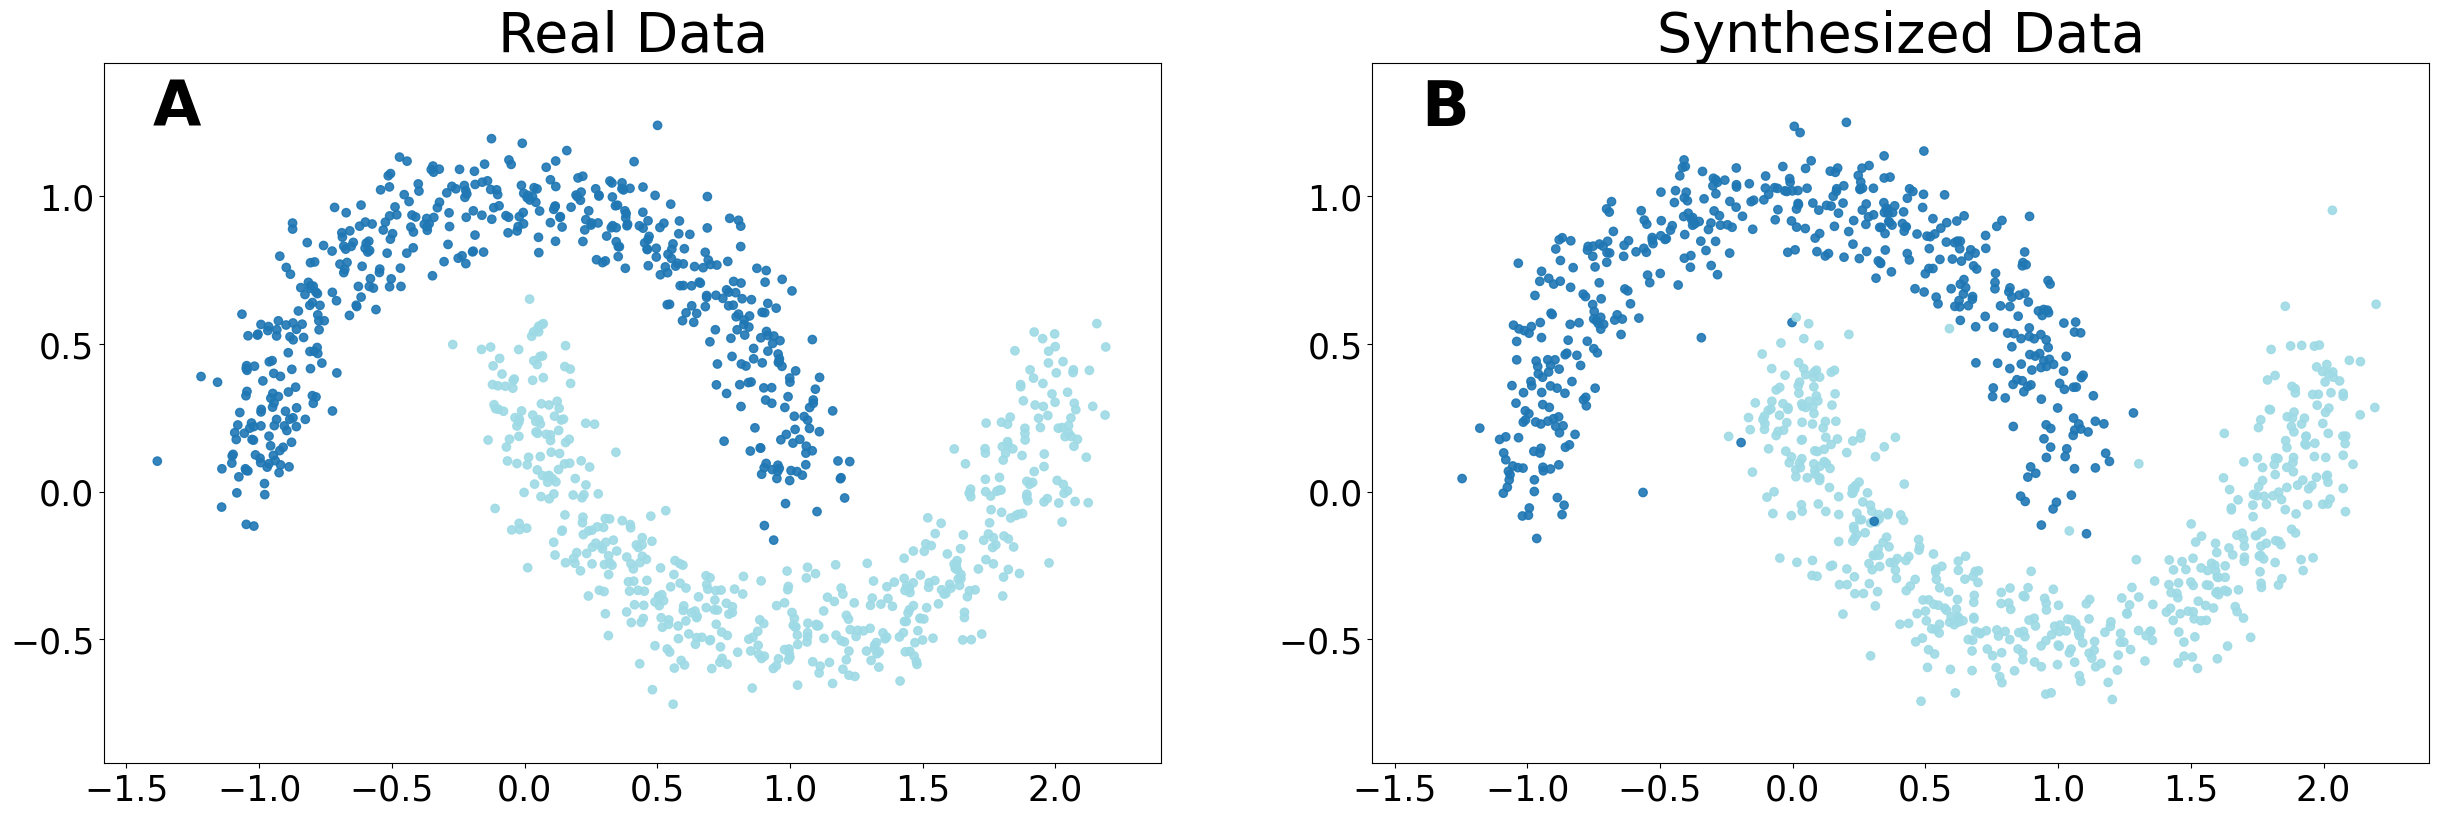

In [312]:
# axes settings
padding = 0.2
xmin = pd.concat([df_test['dim_1'], df_syn['dim_1']]).min() - padding
xmax = pd.concat([df_test['dim_1'], df_syn['dim_1']]).max() + padding
ymin = pd.concat([df_test['dim_2'], df_syn['dim_2']]).min() - padding
ymax = pd.concat([df_test['dim_2'], df_syn['dim_2']]).max() + padding
ax_font = 25

# color settings
alpha = 0.9
col = 'tab20'

plt.subplot(2, 2, 1)
df_test = df[:3000].sample(n=1000)
plt.scatter(df_test['dim_1'], df_test['dim_2'], c = df_test['label'], alpha = alpha, cmap=col)
plt.title('Real Data', fontsize = 40, horizontalalignment = 'center')


ax = plt.gca()
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.xticks(fontsize=ax_font)
plt.yticks(fontsize=ax_font)
ax.annotate('A', xy=(-1.22, 1.4), fontsize = 45, weight = 'bold', transform=ax.transAxes,  va='top', ha='right')


plt.subplot(2, 2, 2)
plt.scatter(df_syn['dim_1'], df_syn['dim_2'], c = df_syn['label'], alpha = alpha, cmap=col)
plt.title('Synthesized Data', fontsize = 40, horizontalalignment = 'center')

# set axes 
ax = plt.gca()
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.xticks(fontsize=ax_font)
plt.yticks(fontsize=ax_font)
ax.annotate('B', xy=(-1.22, 1.4), fontsize = 45, weight = 'bold', transform=ax.transAxes,  va='top', ha='right')

# plot
plt.rcParams['figure.figsize'] = [30, 20]
plt.savefig('twomoons.png')
plt.show()
